In [27]:
import pandas as pd
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import pylab

import os 
import docx as d

In [2]:
defen = pd.read_excel('Data_Extract_From_Gender_Statistics.xlsx', sheetname=1, encoding = 'utf8').append(pd.read_excel('Data_Extract_From_Health_Nutrition_and_Population_Statistics.xlsx', sheetname=1, encoding='utf8')).append(pd.read_excel('Data_Extract_From_Millennium_Development_Goals.xlsx', sheetname=1, encoding='utf8'))

In [30]:
def D_maker(data):
    rez=[]
    for index in data.index:
        for column in data.columns:
            i_tmp = index.split(':')
            c_tmp = column.split(':')
            value=[]
            
            if i_tmp[2]!=u'p-value' and i_tmp[0]!=c_tmp[0]:
                value.append([data.get_value(index=index, col=column),data.get_value(index=i_tmp[0]+':'+i_tmp[1]+':p-value', col=column)])
                
                if abs(value[0][0])>0.5 and value[0][1]<0.001 and value[0][0]!=1:
                    rez.append([defen[defen['Code']==i_tmp[0]]['Indicator Name'].tolist()[0], defen[defen['Code']==c_tmp[0]]['Indicator Name'].tolist()[0], value[0][0]])
                    #Degbug                    
                    #return rez 
    return pd.DataFrame().append(rez)
def doc(data):
    return 0

def Sumup(d_name):
    files = os.listdir(d_name)
    for name in files:
        data = pd.read_excel(d_name+'/'+name ,encoding = 'utf8')
        n_regino = name.split('.')[1].split('_')[2]
        return D_maker(data)

In [35]:
tmp = Sumup('all_results')
tmp.head()

,0,1,2
0,"Inflation, consumer prices (annual %)",Firms with female top manager (% of firms),0.705040
1,"Inflation, consumer prices (annual %)",Main cooking fuel: electricity (% of households),0.747969
2,"Inflation, consumer prices (annual %)",Main cooking fuel: wood (% of households),0.787527
3,"Inflation, consumer prices (annual %)",Decision maker about a woman's own health care...,0.688714
4,"Inflation, consumer prices (annual %)",Decision maker about major household purchases...,0.672566


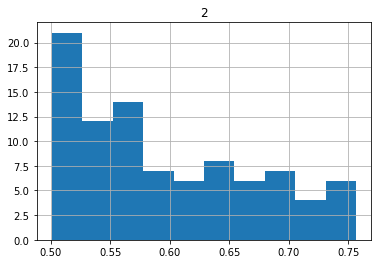

In [24]:
tmp.hist(bins=10)
plt.show()

In [6]:
#for d in ['all_results','data1_results', 'data2_results','data3_results']:
#    Sumup(d)

In [7]:
'all.Corr_in_Africa.xlsx'.split('.')[1].split('_')[2]

'Africa'

In [34]:
d.Document()